<a href="https://colab.research.google.com/github/StreetBta/DS_Fabian/blob/main/EjercicioClase6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso #Regresion linear
from sklearn.linear_model import Ridge #Regresion
from sklearn.linear_model import ElasticNet #Regresion
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BTC-USD.csv')  #Con mi Data de BTC
df 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2742,2022-03-21,41246.132813,41454.410156,40668.042969,41077.996094,41077.996094,24615543271
2743,2022-03-22,41074.105469,43124.707031,40948.281250,42358.808594,42358.808594,32004652376
2744,2022-03-23,42364.378906,42893.507813,41877.507813,42892.957031,42892.957031,25242943069
2745,2022-03-24,42886.652344,44131.855469,42726.164063,43960.933594,43960.933594,31042992291


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2.747000e+03
mean,11668.600272,11981.034949,11325.596907,11682.892098,11682.892098,1.484704e+10
std,16323.683853,16759.568657,15825.584507,16330.191582,16330.191582,1.994819e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,609.122009,611.894501,606.309479,609.234009,609.234009,8.161285e+07
50%,6371.850098,6500.870117,6285.629883,6376.709961,6376.709961,5.227550e+09
75%,10728.271485,10992.468751,10412.890137,10755.395019,10755.395019,2.500517e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
df.shape

(2747, 7)

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df = df.dropna()           
df.isnull().sum()  

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.keys()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df2 = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume' ]].copy()
df2

,Date,Open,High,Low,Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...,...
2742,2022-03-21,41246.132813,41454.410156,40668.042969,41077.996094,24615543271
2743,2022-03-22,41074.105469,43124.707031,40948.281250,42358.808594,32004652376
2744,2022-03-23,42364.378906,42893.507813,41877.507813,42892.957031,25242943069
2745,2022-03-24,42886.652344,44131.855469,42726.164063,43960.933594,31042992291


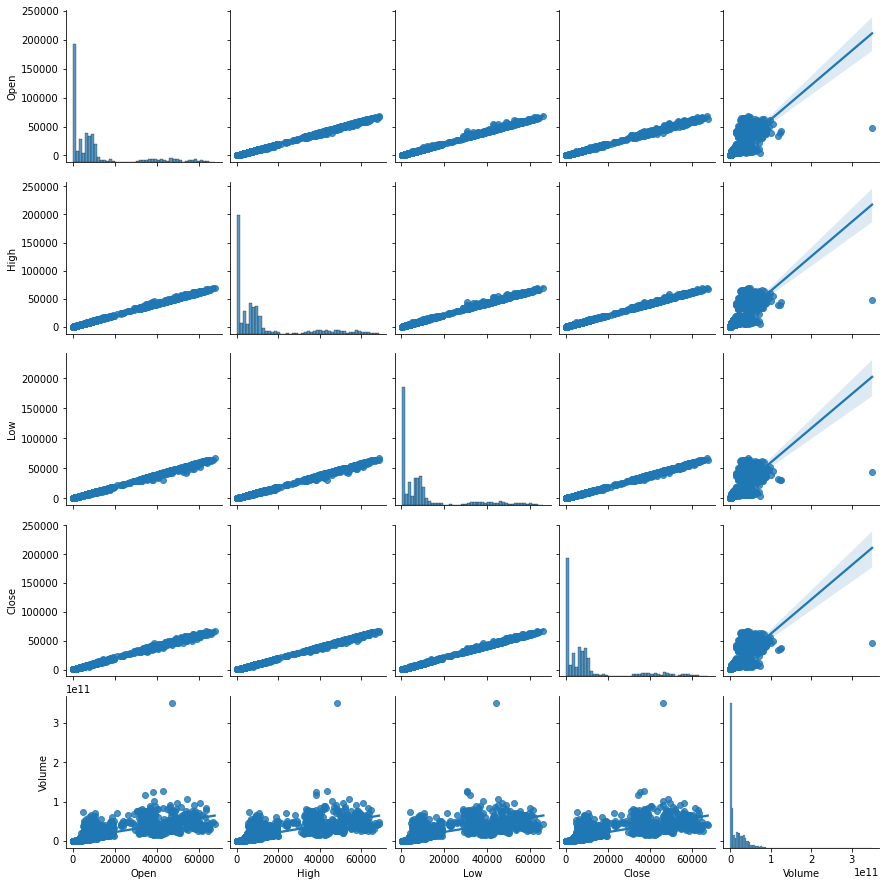

In [ ]:
sns.pairplot(df2, kind ='reg') 

In [ ]:
y = df2['Open']
X = df2[['High', 'Low', 'Close', 'Volume']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(2197, 4) (550, 4) (2197,) (550,)


In [ ]:
X_train

,High,Low,Close,Volume
2321,32944.007813,31106.685547,32289.378906,48643830599
526,427.718994,420.415009,424.544006,70798000
1509,6388.629883,6294.569824,6376.129883,4390020000
144,229.438004,221.076996,223.412003,17145200
2482,35937.566406,34396.476563,35287.781250,24924307911
...,...,...,...,...
763,638.874023,628.013000,630.520020,69381696
835,972.534973,934.833008,961.237976,187474000
1653,4094.902100,4040.266357,4069.107178,9353915899
2607,61590.683594,60163.781250,61527.480469,29094934221


In [ ]:
X_test

,High,Low,Close,Volume
2401,64863.097656,61554.796875,63109.695313,77451779687
1590,3616.087402,3569.092773,3600.865479,5262869046
2381,53392.386719,50856.570313,51704.160156,67999812841
2684,36688.812500,34349.250000,35030.250000,39714385405
1147,7253.319824,7023.100098,7144.379883,2326340096
...,...,...,...,...
1043,2610.760010,2450.800049,2529.449951,937404032
878,1009.289978,982.830017,1004.450012,102261000
1762,11052.766602,9992.006836,10895.089844,25384047207
303,280.279999,272.042999,279.471985,27591400


In [ ]:
lineal = LinearRegression()           #Para saber que porcentaje se asemeja más

In [ ]:
lineal.fit(X_train, y_train)          #Hagame el favor y aprenda, llamo una cantidad de variables, procesos bien pesados en mate y estadis para generar el proceso

LinearRegression()

In [ ]:
lineal.coef_.tolist()  

[1.1029984602068441,
 0.5632025547875883,
 -0.6776882529195518,
 7.652967148885637e-11]

In [ ]:
y_pred_train_lineal = lineal.predict(X_train)   
y_pred_train_lineal 

array([31975.09915313,   417.80370495,  6268.02894953, ...,
        4032.24333659, 60121.55492673, 39515.47857675])

In [ ]:
y_pred_test_lineal = lineal.predict(X_test)
y_pred_test_lineal

array([63445.89847215,  3555.75410818, 52497.12727798, 36073.69402999,
        7111.29880152, 11272.93296236,  2623.59438922,   242.50859989,
        9087.67142565, 11610.69693785,  5814.42439592,  6525.49055854,
        6437.31954214,  6343.59496206,   448.19482449, 14860.25651607,
       10822.42848842,  2354.65280786,  6630.69948287,   228.60780644,
       61826.12751886,  3458.34053759,   277.16901765,  1039.61282175,
       10625.41077982,   307.84620506,   368.39000492, 10229.24068964,
        6279.04503012,   230.13702632,  6493.13348758, 57107.39666128,
        8016.18717345,   207.15990151, 45293.64772825,   398.51117854,
        6377.78390734,  6460.11025953,   369.94480047,   241.01235952,
         232.67448548,  1225.95570843,  1007.99653398,   409.3058297 ,
        8851.00977627, 58197.18974641,  9404.498622  ,  8571.75284489,
       22756.05540019,   220.18970002, 48107.07527571, 10745.68269615,
        9226.38914605, 60191.13291832,   821.00829094,   378.02111316,
      

In [ ]:
metrics.mean_squared_error(y_train,y_pred_train_lineal)

132622.06682391046

In [ ]:
metrics.mean_squared_error(y_test,y_pred_test_lineal) 


146887.06404977266

In [ ]:
metrics.mean_absolute_error(y_train,y_pred_train_lineal)

160.37771479384537

In [ ]:
y_error_train = y_train - y_pred_train_lineal  #Acá da el resultado del error
y_error_train   

2321     89.277800
526       7.233282
1509     97.441265
144       4.559903
2482   -430.444677
           ...    
763      10.094510
835      27.780821
1653     55.341136
2607    947.320073
2732    -75.509827
Name: Open, Length: 2197, dtype: float64

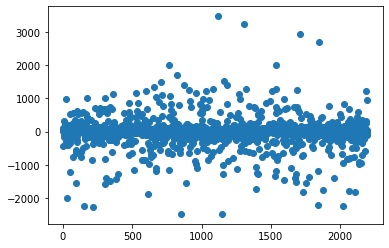

In [ ]:
plt.scatter(x = range(len(y_error_train)), y=y_error_train)

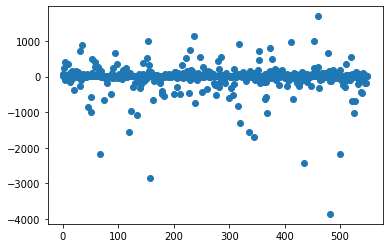

In [ ]:
y_error_test = y_test - y_pred_test_lineal                 
plt.scatter(x = range(len(y_error_test)), y=y_error_test)